In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob, os
import json
from collections import defaultdict
from datetime import datetime

In [2]:
df = pd.read_csv("data/all_abstracts.csv")

In [3]:
df.head()

,Unnamed: 0,index,doi,abstract,citations,Q_doc
0,0,0,10.1103/PhysRevE.51.5058,The spontaneous nucleation of individual micro...,8.0,20.000000
1,1,1,10.1103/PhysRevE.65.017102,It has been recognized for some time that a ne...,3.0,34.962036
2,2,2,10.1103/PhysRevB.100.035307,A tunneling system with a molecule between the...,1.0,30.970356
3,3,3,10.1103/PhysRevD.36.2327,A field theory constructed on a space with a m...,44.0,36.999539
4,4,4,10.1103/PhysRevB.22.1789,Magnetoacoustic dispersion and attenuation for...,1.0,23.000000


In [4]:
df2 = df[['doi','abstract']]
df2.head()

,doi,abstract
0,10.1103/PhysRevE.51.5058,The spontaneous nucleation of individual micro...
1,10.1103/PhysRevE.65.017102,It has been recognized for some time that a ne...
2,10.1103/PhysRevB.100.035307,A tunneling system with a molecule between the...
3,10.1103/PhysRevD.36.2327,A field theory constructed on a space with a m...
4,10.1103/PhysRevB.22.1789,Magnetoacoustic dispersion and attenuation for...


In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250628 entries, 0 to 250627
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   doi       250628 non-null  object
 1   abstract  250628 non-null  object
dtypes: object(2)
memory usage: 3.8+ MB


In [6]:
doi_set = set(df2['doi'])
len(doi_set)

250628

# Export doi-abstract-year to csv

In [31]:
id_to_date_dict = defaultdict()
for filename in glob.iglob('data/aps-dataset-metadata-2020/**', recursive=True):
    if os.path.isfile(filename): # filter dirs
        data = json.load(open(filename))
        if data['id'] in doi_set: # we have your abstract
            processed_date = datetime.strptime(data['date'], "%Y-%m-%d")
            id_to_date_dict[data['id']] = processed_date.year

In [32]:
len(id_to_date_dict)

249311

In [39]:
doi_list = []
abstract_list = []
year_list = []
for index,row in df2.iterrows():
    if row['doi'] in id_to_date_dict.keys(): # take only the papers we have years info for
        doi_list.append(row['doi'])
        abstract_list.append(row['abstract'])
        year_list.append(id_to_date_dict[row['doi']])

df3 = pd.DataFrame(list(zip(doi_list, abstract_list,year_list)), columns =['doi', 'abstract','year']) 
df3.head()

,doi,abstract,year
0,10.1103/PhysRevE.51.5058,The spontaneous nucleation of individual micro...,1995
1,10.1103/PhysRevE.65.017102,It has been recognized for some time that a ne...,2001
2,10.1103/PhysRevB.100.035307,A tunneling system with a molecule between the...,2019
3,10.1103/PhysRevD.36.2327,A field theory constructed on a space with a m...,1987
4,10.1103/PhysRevB.22.1789,Magnetoacoustic dispersion and attenuation for...,1980


In [40]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249311 entries, 0 to 249310
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   doi       249311 non-null  object
 1   abstract  249311 non-null  object
 2   year      249311 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 5.7+ MB


In [41]:
# df3.to_csv("data/all_abstracts_year.csv")

In [48]:
years = sorted(set(df3['year']))

In [55]:
counts_by_year = df3.groupby(['year']).size().to_dict()
counts_by_year

{1919: 14,
 1920: 23,
 1921: 18,
 1922: 18,
 1923: 40,
 1924: 48,
 1925: 61,
 1926: 64,
 1927: 63,
 1928: 80,
 1929: 108,
 1930: 126,
 1931: 149,
 1932: 116,
 1933: 90,
 1934: 118,
 1935: 115,
 1936: 115,
 1937: 133,
 1938: 114,
 1939: 119,
 1940: 113,
 1941: 104,
 1942: 57,
 1943: 35,
 1944: 27,
 1945: 34,
 1946: 71,
 1947: 86,
 1948: 167,
 1949: 204,
 1950: 199,
 1951: 249,
 1952: 245,
 1953: 346,
 1954: 433,
 1955: 446,
 1956: 494,
 1957: 453,
 1958: 435,
 1959: 432,
 1960: 452,
 1961: 499,
 1962: 575,
 1963: 607,
 1964: 723,
 1965: 778,
 1966: 974,
 1967: 1233,
 1968: 1499,
 1969: 1627,
 1970: 1640,
 1971: 1704,
 1972: 1708,
 1973: 1852,
 1974: 1693,
 1975: 1764,
 1976: 1793,
 1977: 1763,
 1978: 1803,
 1979: 1750,
 1980: 1854,
 1981: 1958,
 1982: 2085,
 1983: 2189,
 1984: 2238,
 1985: 2572,
 1986: 2803,
 1987: 3048,
 1988: 3218,
 1989: 3461,
 1990: 3411,
 1991: 3726,
 1992: 3947,
 1993: 4494,
 1994: 4548,
 1995: 4834,
 1996: 4835,
 1997: 4947,
 1998: 5253,
 1999: 5276,
 2000: 5713,

In [58]:
cumulative_by_year = defaultdict()
temp = 0
for y in years:
    cumulative_by_year[y] = counts_by_year[y]+temp
    temp = cumulative_by_year[y]

In [60]:
cumulative_by_year

defaultdict(None,
            {1919: 14,
             1920: 37,
             1921: 55,
             1922: 73,
             1923: 113,
             1924: 161,
             1925: 222,
             1926: 286,
             1927: 349,
             1928: 429,
             1929: 537,
             1930: 663,
             1931: 812,
             1932: 928,
             1933: 1018,
             1934: 1136,
             1935: 1251,
             1936: 1366,
             1937: 1499,
             1938: 1613,
             1939: 1732,
             1940: 1845,
             1941: 1949,
             1942: 2006,
             1943: 2041,
             1944: 2068,
             1945: 2102,
             1946: 2173,
             1947: 2259,
             1948: 2426,
             1949: 2630,
             1950: 2829,
             1951: 3078,
             1952: 3323,
             1953: 3669,
             1954: 4102,
             1955: 4548,
             1956: 5042,
             1957: 5495,
             1958: 5930,


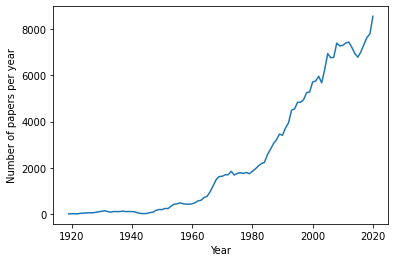

In [54]:
plt.plot(years,[counts_by_year[i] for i in years])
plt.xlabel("Year")
plt.ylabel("Number of papers per year")
plt.savefig("paperperyear.jpg",dpi=300)

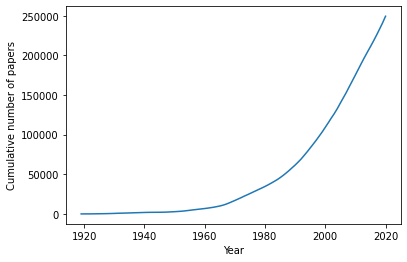

In [59]:
plt.plot(years,[cumulative_by_year[i] for i in years])
plt.xlabel("Year")
plt.ylabel("Cumulative number of papers")
plt.savefig("cumpaperperyear.jpg",dpi=300)

# Export doi-abstract-date to csv

In [7]:
id_to_fulldate_dict = defaultdict()
for filename in glob.iglob('data/aps-dataset-metadata-2020/**', recursive=True):
    if os.path.isfile(filename): # filter dirs
        data = json.load(open(filename))
        if data['id'] in doi_set: # we have your abstract
            id_to_fulldate_dict[data['id']] = data['date']

In [8]:
doi_list = []
abstract_list = []
date_list = []
for index,row in df2.iterrows():
    if row['doi'] in id_to_fulldate_dict.keys(): # take only the papers we have years info for
        doi_list.append(row['doi'])
        abstract_list.append(row['abstract'])
        date_list.append(id_to_fulldate_dict[row['doi']])

df4 = pd.DataFrame(list(zip(doi_list, abstract_list,date_list)), columns =['doi', 'abstract','date']) 
df4.head()

,doi,abstract,date
0,10.1103/PhysRevE.51.5058,The spontaneous nucleation of individual micro...,1995-05-01
1,10.1103/PhysRevE.65.017102,It has been recognized for some time that a ne...,2001-12-17
2,10.1103/PhysRevB.100.035307,A tunneling system with a molecule between the...,2019-07-16
3,10.1103/PhysRevD.36.2327,A field theory constructed on a space with a m...,1987-10-15
4,10.1103/PhysRevB.22.1789,Magnetoacoustic dispersion and attenuation for...,1980-08-15


In [9]:
df4 = df4.sort_values(by='date',ascending=True)
df4.head()

,doi,abstract,date
152044,10.1103/PhysRev.13.272,Synopsis. A device is described which makes it...,1919-04-01
189173,10.1103/PhysRev.13.337,Synopsis.—A series of experiments was performe...,1919-05-01
211565,10.1103/PhysRev.13.373,Synopsis.—This paper offers an explanation of ...,1919-06-01
54165,10.1103/PhysRev.13.434,Synopsis.—The investigation of high vacua has ...,1919-06-01
220674,10.1103/PhysRev.14.67,Synopsis.—The object has been to measure both ...,1919-07-01


In [10]:
df4.tail()

,doi,abstract,date
197505,10.1103/PhysRevD.102.116023,We investigate how to include bound states in ...,2020-12-31
204996,10.1103/PhysRevC.102.064913,We use the microscopic Giessen Boltzmann-Uehli...,2020-12-31
136314,10.1103/PhysRevAccelBeams.23.123101,In order to minimize the surface resistance in...,2020-12-31
74599,10.1103/PhysRevLett.125.263606,We present a direct mapping between the quantu...,2020-12-31
117529,10.1103/PhysRevD.102.124078,In this paper we study the dynamics of neutral...,2020-12-31


In [11]:
df4.to_csv("data/all_abstracts_date.csv")

In [12]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 249311 entries, 152044 to 117529
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   doi       249311 non-null  object
 1   abstract  249311 non-null  object
 2   date      249311 non-null  object
dtypes: object(3)
memory usage: 7.6+ MB
